# Handwritten Digitals Classification for Math App
1. Show data cleaning and preparation steps

2. Perform EDA on the given dataset and list out findings

3. Predict the digits with different algorithms - Use Accuracy as a metric and provide best possible accuracy. 

4. Evaluate the training size impact on accuracy of the selected classification algorithm: Guassian Naive Classification with covariance. 

In [1]:
# Importing neccessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

from scipy.stats import multivariate_normal as mvn
import seaborn as sns

import os 

os.getcwd()

'C:\\Users\\Apple\\Anaconda3\\Scripts'

## 1. Data Cleaning and preparation steps

In [2]:
# Load dataset
data = pd.read_csv("MNIST.csv")
data.head()

,Unnamed: 0,index,Unnamed: 0.1,0,1,2,3,4,5,6,...,775,776,777,778,779,780,781,782,783,labels
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,4,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
# frequency of each digits

data.iloc[:,-1].value_counts(normalize=True)

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: labels, dtype: float64

In [4]:
# create X and y

data = data.to_numpy()
data = data[: ,3:]

N,D = data.shape

#for i in range(N-1, 0, -1): 
      
#    # Pick a random index from 0 to i  
#    j = rd.randint(0, i + 1)  
#    # Swap arr[i] with the element at random index  
#    temp = data[i,:]
#    data[i,:] = data[j,:]
#    data[j,:] = temp



X= data[:, :-1] 

y = data[:,-1] 

# doing bernulli Naive Classification
#X[np.where(X> 127)] = 1
#X[np.where(X<=127)] =0

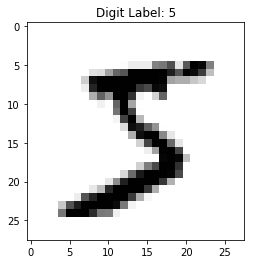

In [5]:
# First row is first image
first_image = X[0,:]
first_label = y[0]

# 784 columns correspond to 28x28 image
plottable_image = np.reshape(first_image, (28, 28))

# Plot the image
plt.imshow(plottable_image, cmap='gray_r')
plt.title('Digit Label: {}'.format(first_label))
plt.show()

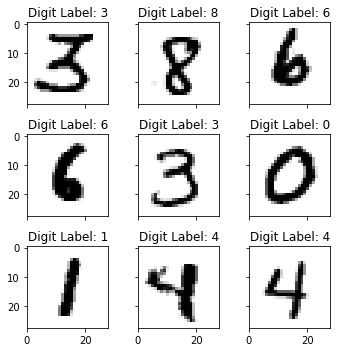

In [6]:
# random data set looks like as digital images

images_to_plot = 9
random_indices = rd.sample(range(60000), images_to_plot) 

sample_images = X[random_indices, :]
sample_labels = y[random_indices]

fig, axes = plt.subplots(3,3, 
                         figsize=(5,5),
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box-forced', aspect='equal'))  

for i in range(images_to_plot):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//3 
    subplot_col = i%3  
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_title('Digit Label: {}'.format(sample_labels[i]))
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

Text(0,0.5,'Count')

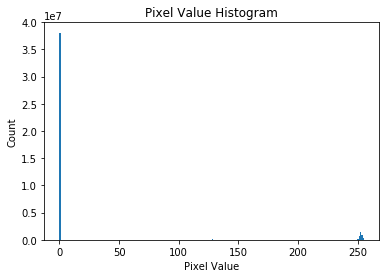

In [7]:
results = np.zeros(784*60000)

for i in range(784):
    for j in range(60000):
        results[j*784+i] = X[j][i]
        
        
plt.hist(results, bins = 256)
plt.title('Pixel Value Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Count')# average pixel values for digital images


# 2. Perform EDA on the given dataset and list out findings

# 2. Feature Engineering

Based on the above pixel values distribution, we can use 0 and 1 for pixel values using specific cutoff value. 



In [ ]:
# doing bernulli Naive Classification
#X[np.where(X> 100)] = 1
#X[np.where(X<=100)] =0

# 3. Perform EDA on the given dataset and list out findings
1. average values of pixels for each digits, and visualization 
2. Variability of each digit using Euclidean distance by using boxplot.  


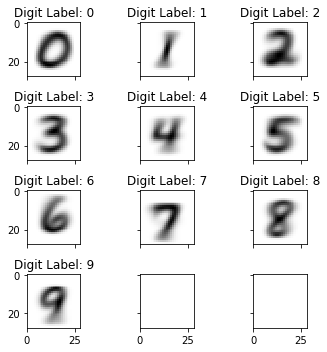

In [8]:
images_to_plot = 10

fig, axes = plt.subplots(4,3, 
                         figsize=(5,5),
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box-forced', aspect='equal'))  


pixelValue_mean = np.zeros((images_to_plot, 784))


for i in range(images_to_plot):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//3 
    subplot_col = i%3  
    ax = axes[subplot_row, subplot_col]
        
    i_meanPixel = np.mean(X[y==i], axis = 0)
    pixelValue_mean[i] = i_meanPixel
    
    # plot image on subplot
    plottable_image = np.reshape(i_meanPixel, (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_title('Digit Label: {}'.format(i))
    ax.set_xbound([0,28])

    
plt.tight_layout()
plt.show()

In [553]:
# Convert resident status to one hot encoding
df_merge2['foreigner'] = [1 if i == 'Foreigner' else 0 for i in df_merge2.resident_status]
df_merge2['pr'] = [1 if i == 'PR' else 0 for i in df_merge2.resident_status]
df_merge2['Singapore Citizen'] = [1 if i == 'Singapore citizen' else 0 for i in df_merge2.resident_status]
df_merge2['Singaporean'] = [1 if i == 'Singaporean' else 0 for i in df_merge2.resident_status]

In [9]:
# Convert gender to one hot encoding
Data_EuDist = np.zeros(60000)

for k in range(10):
    
    indices = np.where(y==k)
    
    for j in range(len(indices[0])):
        Data_EuDist[indices[0][j]] = np.linalg.norm(X[indices[0][j]] - pixelValue_mean[k], axis = 0)



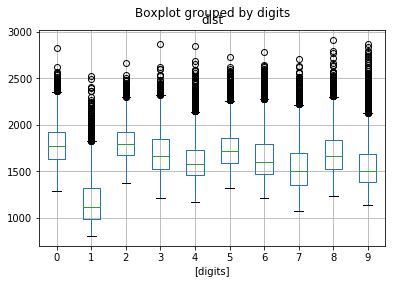

In [10]:
# Boxplot of variability of digit images

data2plot = pd.DataFrame(Data_EuDist,columns = ["dist"])

data2plot['digits'] = y 

data2plot
data2plot.boxplot(by = 'digits')

# 3. Model Selection
We look at three types of classification algorithms: Simple Gaussian classification without feature covariance, Gaussian classification with feature covariance and Bernoulli classification. 

Gaussian classification gave us the highest accuracy about 95%, while Bernoulli classification gave us 85% with a little loss of information when doing feature engineering.  


In [ ]:
# simple Guassian Naive Bayes without covariance
class GuassNB:
  def fit(self, X, y, epsilon= 1e-3):
      self.likelihoods = dict()
      self.priors=dict()
      self.K = set(y.astype(int))

      for k in self.K:
        X_k = X[y==k,:]
        self.likelihoods[k] = {"mean":X_k.mean(axis =0), "cov": X_k.var(axis = 0)+ epsilon}
        self.priors[k] =len(X_k)/len(X)

  def predict(self, X):
      N, D = X.shape
      P_hat = np.zeros((N, len(self.K)))
      
      for k, l in self.likelihoods.items():
        P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k]) 
      
      return P_hat.argmax(axis =1)

In [12]:
# Guassian Naive Bayes with covariance

class GuassBayes:
  
    def fit(self, X, y, epsilon= 1e3):
      self.likelihoods = dict()
      self.priors=dict()
      self.K = set(y.astype(int))
      N, D = X.shape
      for k in self.K:
        X_k = X[y==k,:]
        mu_k = X_k.mean(axis =0)
        self.likelihoods[k] = {"mean":X_k.mean(axis =0), "cov": 1/(len(X_k))* np.matmul((X_k-mu_k).T,(X_k - mu_k)) + epsilon*np.identity(D)}
        #self.likelihoods[k] = {"mean":X_k.mean(axis =0), "cov": X_k.var(axis = 0)+ epsilon}
        self.priors[k] =len(X_k)/len(X)

    def predict(self, X):
       N, D = X.shape
       P_hat = np.zeros((N, len(self.K)))
          
       for k, l in self.likelihoods.items():
          P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k]) 
          
       return P_hat.argmax(axis =1)

In [774]:
class BernoulliBayes:
    
    def fit(self, X, y, epsilon= 0.01):
      self.likelihoods = dict()
      self.likelihoods2 = dict() 
      self.priors=dict()
      self.K = set(y.astype(int))
      N, D = X.shape
      for k in self.K:
        X_k = X[y==k]
        #mu_k = X_k.mean(axis =0)
        pixel_prob_k = (sum(X_k)+1)/(len(X_k)+ 2)
        print(pixel_prob_k.shape)
#        print(pixel_prob_k.shape)
        self.likelihoods[k] = {"mean":pixel_prob_k , "cov": pixel_prob_k * (1 - pixel_prob_k) }
        
        #for j in range(D):
        #    self.likelihoods2[k] 
        #self.likelihoods[k] = {"mean":sum(X_k, axis = 0)/len(X_k), "cov": (sum(X_k, axis = 0)/len(X_k))* 
        #                       (1 - sum(X_k, axis = 0)/len(X_k))  + epsilon}
        #self.likelihoods[k] = {"mean":X_k.mean(axis =0), "cov": X_k.var(axis = 0) + epsilon}
        self.priors[k] =len(X_k)/len(X)

    def predict(self, X):
       N, D = X.shape
       P_hat = np.zeros((N, len(self.K)))
       
       for k, l in self.likelihoods.items():
          
           
    #      pixel_benoulli_prob =  
    #      P_hat[:,k] = [np.log(sum(X_k, axis = 0)/len(X_k))*(y[:,k]==1)  + (y[:,k]==0)*(1-np.log(sum(X_k, axis = 0)/len(X_k)))   + np.log(self.priors[k]) 
          P_hat[:,k] = np.sum(np.log(l['mean']) * X, axis=1) + np.sum(np.log(abs(1-l["mean"])) * (1-X), axis=1) + np.log(self.priors[k])
#          P_hat[:,k] = np.log(self.priors[k]) + np.matmul()
#          print(X.shape)



#          print(l['mean'].shape)
#          print((X*np.log(l['mean'])).shape)
       return P_hat.argmax(axis =1)

In [ ]:
gnb = GuassBayes()
# gnb = BernoulliBayes()
#gnb = GuassNB()
gnb.fit(X,y)
y_hat = gnb.predict(X)
print(accuracy(y_train,y_hat))

# 3. Training set size impact on accuracy

We also looked at the impact of train set to evaluate training set size impact on the accuracy of a typical algorithm. With average accuracy of 94.9% on test set with training set ranging from 10% to 90%. Training set size has immaterial impact on the accuracy of Gaussian Naïve Bayes classification which confirms the multivariate Gaussian distribution of the pixel features. 


In [787]:
Accuracy_train = []
Accuracy_test = []
#
for i in range(6,7):
    testsize = (i)/10
    
    TrainLastRow = int((1-testsize)*N)
        
    X_train= X[:TrainLastRow,:]
    X_test = X[TrainLastRow:, :]
        
    y_train = y[:TrainLastRow, ]
    y_test = y[TrainLastRow:,]
    
    gnb = GuassBayes()
    gnb.fit(X_train,y_train)
    
    y_hat = gnb.predict(X_train)
    y_test_hat = gnb.predict(X_test)
    
    accuracy_Train = accuracy(y_train, y_hat)
    accuracy_Test = accuracy(y_test, y_test_hat)
        
    Accuracy_train.append(accuracy_Train) 
    Accuracy_test.append(accuracy_Test)
    cm = confusion_matrix(y_test, y_test_hat)

## Our winner is Gaussian Naive Classification with Covariance: Accuracy: 95%